# Clasificación de Imagenes: Cats&Dogs

## 1. Descarga del dataset

Empezamos descargando el dataset (un fichero comprimido) compuesto 2000 imágenes en formato JPG de gatos y perros. El fichero descargado queda en la carpeta `/tmp`.

In [ ]:
import os
import zipfile

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'

--2021-11-09 15:43:16--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.70.128, 74.125.132.128, 74.125.202.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.70.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   115MB/s    in 0.6s    

2021-11-09 15:43:17 (115 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



**Importante:** Estas 2000 imágenes son de hecho una parte pequeña del dataset completo que incluye 25000 imágenes. Si queremos trabajar con el dataset completo sigue los pasos siguientes ... pero cuidado que todo va a tardar muchisimo más tiempo. El código es más largo y complejo pues en el se hace la partición del dataset en las distintas partes de training y validacion.

In [ ]:
import os
import zipfile
from shutil import copyfile
import random

!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

try:
    os.mkdir('/tmp/cats_and_dogs')
    os.mkdir('/tmp/cats_and_dogs/train')
    os.mkdir('/tmp/cats_and_dogs/validation')
    os.mkdir('/tmp/cats_and_dogs/train/cats')
    os.mkdir('/tmp/cats_and_dogs/train/dogs')
    os.mkdir('/tmp/cats_and_dogs/validation/cats')
    os.mkdir('/tmp/cats_and_dogs/validation/dogs')
except OSError:
    pass

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"

TRAINING_CATS_DIR = "/tmp/cats_and_dogs/train/cats/"
TESTING_CATS_DIR = "/tmp/cats_and_dogs/validation/cats/"
TRAINING_DOGS_DIR = "/tmp/cats_and_dogs/train/dogs/"
TESTING_DOGS_DIR = "/tmp/cats_and_dogs/validation/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

base_dir = '/tmp/cats_and_dogs'


--2021-11-08 14:13:00--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 104.80.224.107, 2a02:26f0:e3:39c::e59, 2a02:26f0:e3:3af::e59
Connecting to download.microsoft.com (download.microsoft.com)|104.80.224.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M   141MB/s    in 5.9s    

2021-11-08 14:13:06 (134 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


El contenido del fichero descomprimido quedara en la carpeta `/tmp/cats_and_dogs_filtered` para el dataset reducido o en `/tmp/cats_and_dogs` para el dataset completo. En ambos casos, la carpeta contiene dos subcarpetas: `train` and `validation`. Asignemos el nombre de dichas carpetas a unas variables:

In [ ]:

# Directorios de training con imagenes de gatos y perros
train_dir = os.path.join(base_dir, 'train')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directorios de validacion con imagenes de gatos y perros
validation_dir = os.path.join(base_dir, 'validation')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

Para entender el contenido del dataset, veamos primero cuantos ficheros contiene cada una de las carpetas:

In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


Y despues ver algunos de las imagenes disponibles. Para ello hace falta configurar matplot. Se muestran 8 imagenes de gatos y 8 de perros. Cada vez que se reejecuta la segunda caja de codigo se muestran nuevas imagenes. Observar que las imagenes tienen tamaño distinto en cuanto a numero de filas y columnas.

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

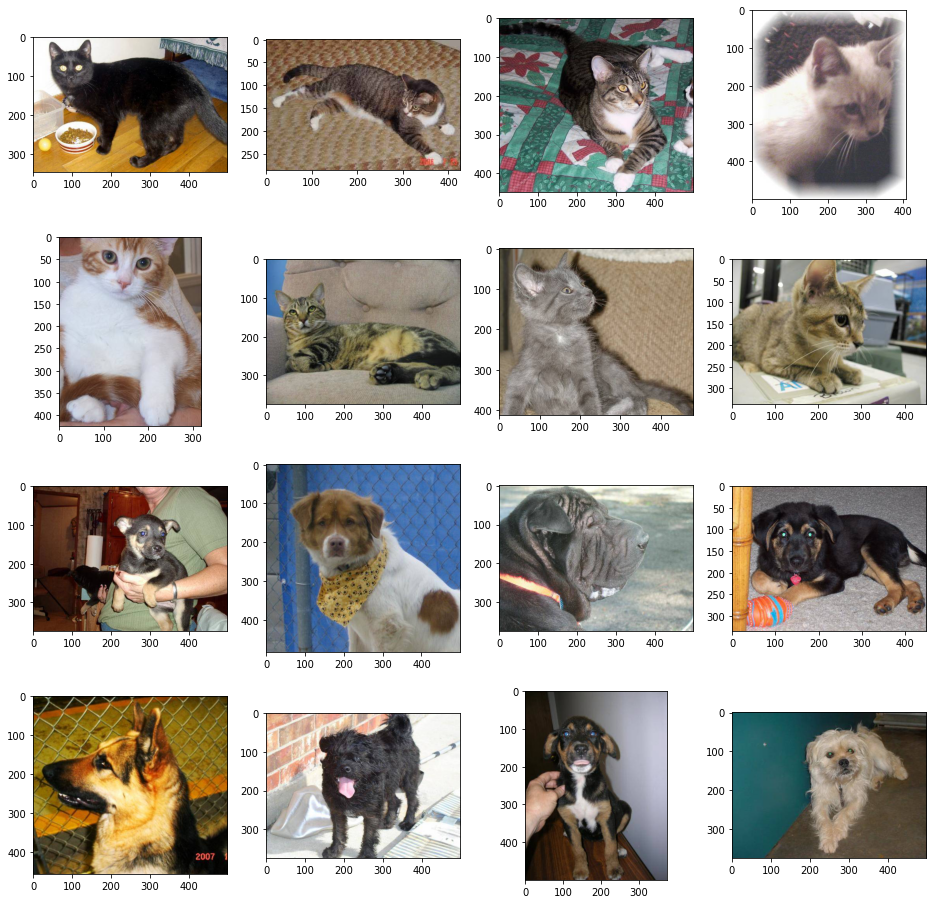

In [ ]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  #sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


## 2. Definicion de modelos

Definiremos varios modelos en esta sección. Elegir el que os interese probar. El primero es la misma red convolucional utilitzada para el dataset de MNIST, pero con imagenes RGB. El segundo modelo es una red convolucional mucho mas compleja, VGG16, con 16 capas definida desde cero. Finalmente el tercer modelo es la misma red VGG16 pero ya preentrenada en todas sus capas convolucionales a partir del dataset ImageNet. En todos los casos las imagenes que alimentaran a nuestros modelos son de 150x150 pixeles.*italicized text*

###2.1. Convolutional neural network simple

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPool2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPool2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

or this one ...

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model = Sequential()

model.add(Conv2D(input_shape=(150,150,3),filters=32,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 128)      

### 2.2 Red convolucional VGG16 from Scratch

In [ ]:
#from tensorflow.keras import layers
#from tensorflow.keras import Model
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model = Sequential()

model.add(Conv2D(input_shape=(150,150,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 64)      1792      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 150, 150, 64)      36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 37, 37, 256)      

### 2.3 VGG16 pre-entrenada con ImageNet

Primero reutilizamos solo las capas convolucionales de la red VGG16 (include_top=false) indicandole que no entrene los pesos de sus neuronas (layer.trainable=False).

In [ ]:
import tensorflow as tf

from tensorflow.keras.applications import VGG16
pre_model = VGG16(input_shape = (150, 150, 3), 
                            include_top = False, 
                            weights = 'imagenet')

pre_model.summary()

for layer in pre_model.layers:
  layer.trainable = False

pre_model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

Y luego le añadimos las capas fully-connected del final que si que se entrenaran para hacer la clasificación.

In [ ]:
model = tf.keras.models.Sequential([
    pre_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


### 2.4 VGG16 pre-entrenada con ImageNet con fine tuning

En este caso reutilizamos todas las capas convolucionales de la red VGG16 (include_top=false) excepto las ultimas  (layer.trainable=True).

In [ ]:
import tensorflow as tf

from tensorflow.keras.applications import VGG16
pre_model = VGG16(input_shape = (150, 150, 3), 
                            include_top = False, 
                            weights = 'imagenet')

pre_model.trainable = True

set_trainable = False

for layer in pre_model.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable: 
    layer.trainable = True
  else:
    layer.trainable = False

pre_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

Y luego le añadimos las capas fully-connected del final que si que se entrenaran para hacer la clasificación.

In [ ]:
model = tf.keras.models.Sequential([
    pre_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


## 3. Entrenamiento del modelo

Independientemente del modelo escogido, a continuación se procede. configurar el proceso de entrenamiento con la funcion de optimizacion elegida. 

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

opt = RMSprop(learning_rate=0.001)
#opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

#model.compile(loss='binary_crossentropy',
#              optimizer=RMSprop(lr=0.001),
#              metrics=['accuracy'])

### 3.1 Data Preprocessing

Para este ejemplo hace falta un paso de conversion de las imagenes que estan en ficheros y carpetas a tensores (con valores reales, hara falta que se haga la conversion de RGB 0-255 a numeros reales 0-1) que alimenten a la red convolucional escogida. Para ello se definen unos genreadores tanto para las imagenes del training set como del validation set. Los generadores enviaran lotes de 20 imagenes de tamaño 150x150 con sus etiquetas (binarias). Para el dataset completo se deberia de modificar a lotes de 250 imagenes.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        #batch_size=250, # for large dataset
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        #batch_size=50, # for large dataset
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### 3.2 Entrenamiento
Entreamos con 15 epochs, esto puede tardar mucho tiempo ... paciencia.

In [17]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      #steps_per_epoch=45,  # 11250 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      #validation_steps=25,  # 1250 images = batch_size * steps
      verbose=2)

Epoch 1/15
100/100 - 56s - loss: 2.9869 - accuracy: 0.4835 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/15
100/100 - 21s - loss: 0.6932 - accuracy: 0.4880 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/15
100/100 - 21s - loss: 0.6932 - accuracy: 0.4830 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/15
100/100 - 21s - loss: 0.6932 - accuracy: 0.4880 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/15
100/100 - 21s - loss: 0.6932 - accuracy: 0.4740 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/15
100/100 - 21s - loss: 0.6932 - accuracy: 0.4820 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/15
100/100 - 21s - loss: 0.6932 - accuracy: 0.4910 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/15
100/100 - 21s - loss: 0.6932 - accuracy: 0.4860 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 9/15
100/100 - 21s - loss: 0.6932 - accuracy: 0.4940 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 10/15
100/100 - 21s - loss: 0.6932 - accuracy: 0.4930 - val_loss: 0.6931 - val_accura

### 4. Evaluación de la Exactitud del modelo

Visualizamos la evolución de la exactitud a lo largo de las epocas, tanto para el training como para la validacion.

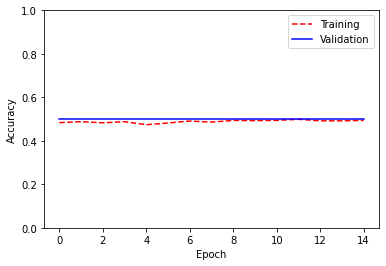

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_history(history):     
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['accuracy'],'r--',
           label='Training')
  plt.plot(hist['epoch'], hist['val_accuracy'],'b',
           label = 'Validation')
  plt.ylim([0,1])
  plt.legend()
  plt.show()

plot_history(history)

## Clean Up

Before running the next exercise, run the following cell to terminate the kernel and free memory resources:

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)